In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/retail_sales_dataset.csv')

# Inspect the first few rows
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Check for duplicates
print(data.duplicated().sum())

# Standardize column names
data.columns = [col.strip().lower().replace(' ', '_') for col in data.columns]

# Convert data types
data['date'] = pd.to_datetime(data['date'])
data['customer_id'] = data['customer_id'].astype(str)
data['transaction_id'] = data['transaction_id'].astype(str)
data['quantity'] = pd.to_numeric(data['quantity'], errors='coerce')
data['price_per_unit'] = pd.to_numeric(data['price_per_unit'], errors='coerce')
data['total_amount'] = pd.to_numeric(data['total_amount'], errors='coerce')

# Handle missing or erroneous values
data = data.dropna(subset=['date', 'customer_id', 'transaction_id', 'quantity', 'price_per_unit', 'total_amount'])
data = data[data['quantity'] > 0]
data = data[data['price_per_unit'] > 0]
data = data[data['total_amount'] > 0]

# Reset index
data = data.reset_index(drop=True)

# Confirm cleaned data
print(data.info())
print(data.head())


   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999

In [ ]:
# Numeric descriptive statistics
numeric_cols = ['quantity', 'price_per_unit', 'total_amount', 'age']

# Mean, median, std
print(data[numeric_cols].mean())
print(data[numeric_cols].median())
print(data[numeric_cols].std())

# Mode
print(data[numeric_cols].mode())

# Identify outliers using IQR
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[col] < Q1 - 1.5 * IQR) | (data[col] > Q3 + 1.5 * IQR)]
    print(f"{col} outliers count: {outliers.shape[0]}")

# Categorical descriptive statistics
categorical_cols = ['gender', 'product_category']

for col in categorical_cols:
    print(data[col].value_counts())
    print(data[col].value_counts(normalize=True) * 100)  # percentages


quantity            2.514
price_per_unit    179.890
total_amount      456.000
age                41.392
dtype: float64
quantity            3.0
price_per_unit     50.0
total_amount      135.0
age                42.0
dtype: float64
quantity            1.132734
price_per_unit    189.681356
total_amount      559.997632
age                13.681430
dtype: float64
   quantity  price_per_unit  total_amount  age
0       4.0            50.0          50.0   43
1       NaN             NaN           NaN   64
quantity outliers count: 0
price_per_unit outliers count: 0
total_amount outliers count: 0
age outliers count: 0
gender
Female    510
Male      490
Name: count, dtype: int64
gender
Female    51.0
Male      49.0
Name: proportion, dtype: float64
product_category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64
product_category
Clothing       35.1
Electronics    34.2
Beauty         30.7
Name: proportion, dtype: float64


/tmp/ipython-input-2234460253.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = data_ts['total_amount'].resample('M').sum()


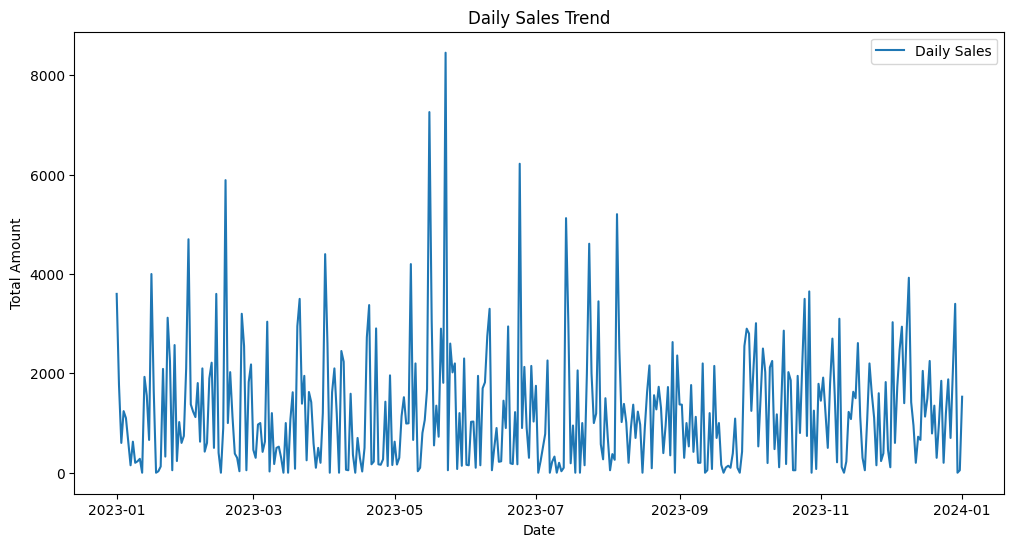

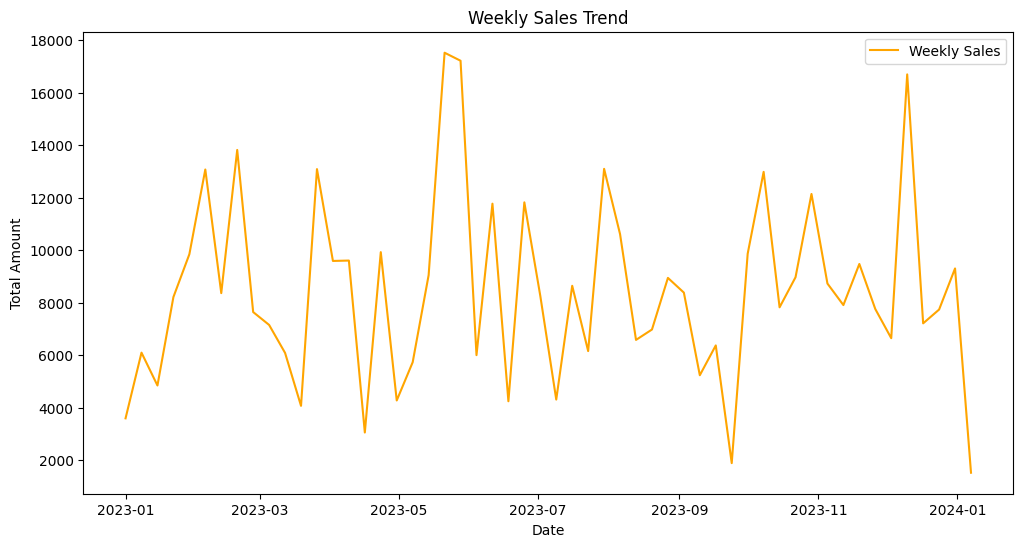

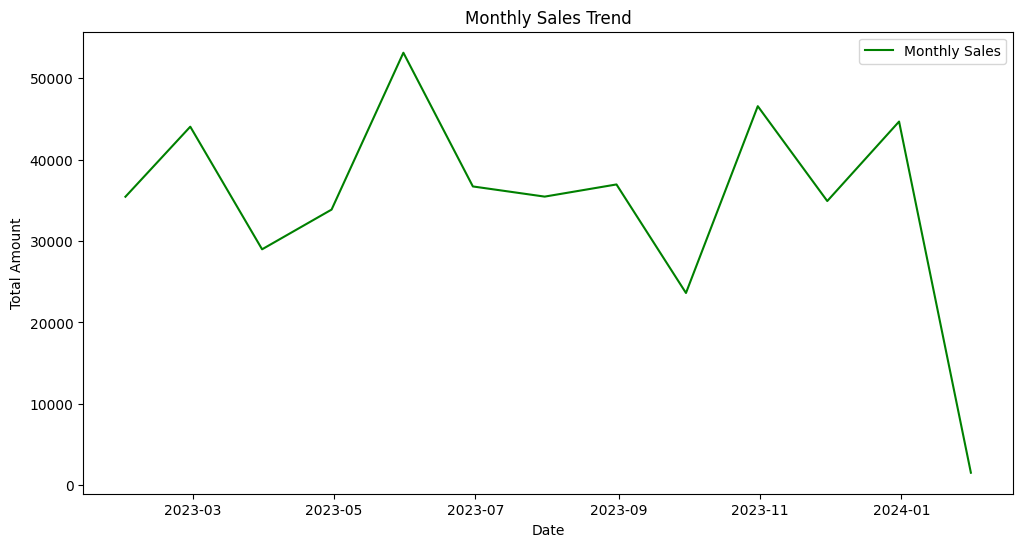

In [ ]:
import matplotlib.pyplot as plt

# Ensure 'date' is datetime type
data['date'] = pd.to_datetime(data['date'])

# Set date as index for time series operations
data_ts = data.set_index('date')

# Aggregate sales
daily_sales = data_ts['total_amount'].resample('D').sum()
weekly_sales = data_ts['total_amount'].resample('W').sum()
monthly_sales = data_ts['total_amount'].resample('M').sum()

# Plot daily sales
plt.figure(figsize=(12,6))
plt.plot(daily_sales, label='Daily Sales')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.legend()
plt.show()

# Plot weekly sales
plt.figure(figsize=(12,6))
plt.plot(weekly_sales, label='Weekly Sales', color='orange')
plt.title('Weekly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.legend()
plt.show()

# Plot monthly sales
plt.figure(figsize=(12,6))
plt.plot(monthly_sales, label='Monthly Sales', color='green')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.legend()
plt.show()


In [ ]:
# Sales by product category
category_sales = data.groupby('product_category')['total_amount'].sum().sort_values(ascending=False)
print(category_sales)

# Top-selling products
top_products = data.groupby('product_category')['total_amount'].sum().sort_values(ascending=False).head(10)
print(top_products)

# Low-selling products
low_products = data.groupby('product_category')['total_amount'].sum().sort_values(ascending=True).head(10)
print(low_products)

# Customer demographics
# Gender distribution
gender_dist = data['gender'].value_counts()
print(gender_dist)

# Age distribution
age_stats = data['age'].describe()
print(age_stats)

# Purchase frequency per customer
purchase_freq = data.groupby('customer_id')['transaction_id'].nunique().sort_values(ascending=False)
print(purchase_freq.head(10))  # most frequent buyers

# Average basket size per transaction
basket_size = data.groupby('transaction_id')['total_amount'].sum()
print(basket_size.describe())


product_category
Electronics    156905
Clothing       155580
Beauty         143515
Name: total_amount, dtype: int64
product_category
Electronics    156905
Clothing       155580
Beauty         143515
Name: total_amount, dtype: int64
product_category
Beauty         143515
Clothing       155580
Electronics    156905
Name: total_amount, dtype: int64
gender
Female    510
Male      490
Name: count, dtype: int64
count    1000.00000
mean       41.39200
std        13.68143
min        18.00000
25%        29.00000
50%        42.00000
75%        53.00000
max        64.00000
Name: age, dtype: float64
customer_id
CUST999    1
CUST001    1
CUST002    1
CUST003    1
CUST004    1
CUST005    1
CUST006    1
CUST007    1
CUST983    1
CUST982    1
Name: transaction_id, dtype: int64
count    1000.000000
mean      456.000000
std       559.997632
min        25.000000
25%        60.000000
50%       135.000000
75%       900.000000
max      2000.000000
Name: total_amount, dtype: float64


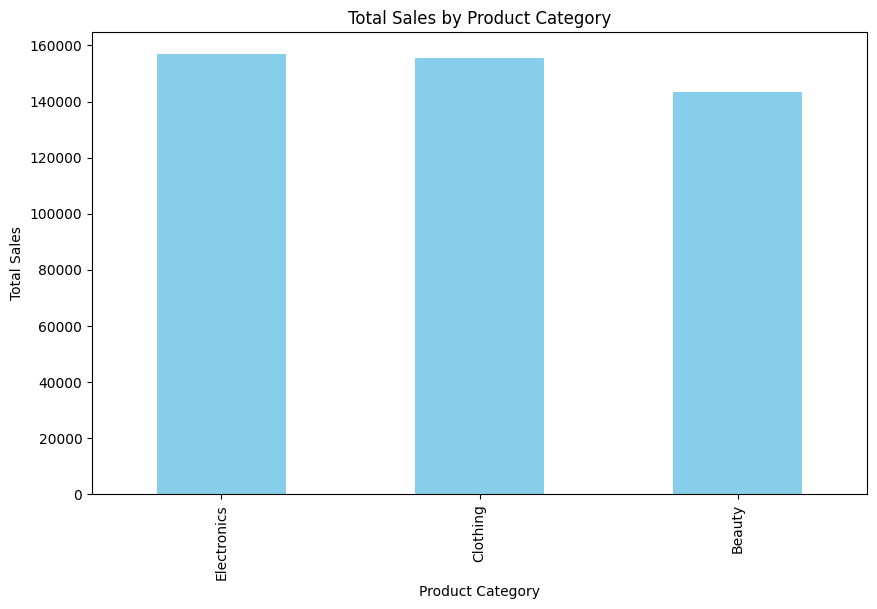

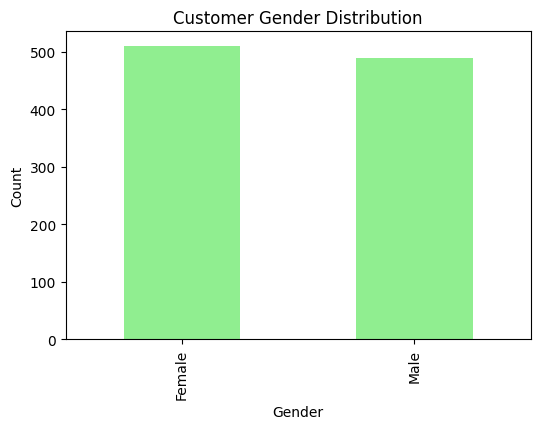

/tmp/ipython-input-1361562921.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = data.set_index('date')['total_amount'].resample('M').sum()


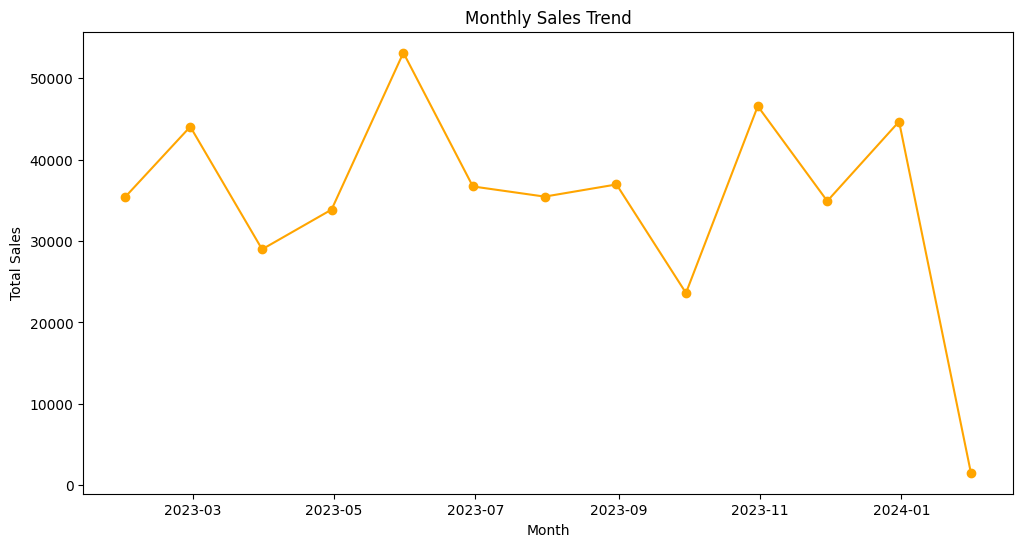

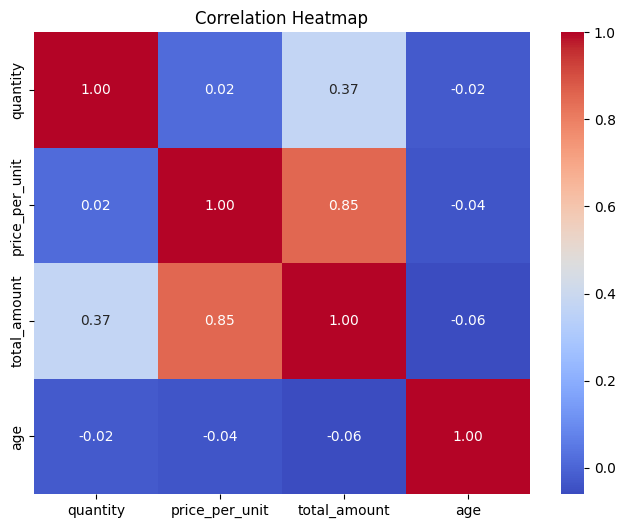

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart: Sales by product category
plt.figure(figsize=(10,6))
category_sales = data.groupby('product_category')['total_amount'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.show()

# Bar chart: Gender distribution of customers
plt.figure(figsize=(6,4))
gender_dist = data['gender'].value_counts()
gender_dist.plot(kind='bar', color='lightgreen')
plt.title('Customer Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Line plot: Monthly sales trend
monthly_sales = data.set_index('date')['total_amount'].resample('M').sum()
plt.figure(figsize=(12,6))
plt.plot(monthly_sales, marker='o', linestyle='-', color='orange')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

# Heatmap: Correlation between numeric variables
numeric_cols = ['quantity', 'price_per_unit', 'total_amount', 'age']
plt.figure(figsize=(8,6))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


**Inventory Adjustments**

Increase stock for top-selling products and categories identified in sales analysis.

Reduce or phase out low-selling products to optimize storage costs.

Monitor seasonal spikes to ensure inventory meets peak demand periods.


**High-Value Customer Segments**

Target customers with high purchase frequency or high average basket size.

Consider personalized promotions for top-spending age groups or gender segments.

Track repeat customers to build loyalty programs.

**Promotional Strategies**

Offer discounts or bundles for low-performing products to boost sales.

Use targeted campaigns based on customer demographics and buying patterns.

Cross-sell products frequently purchased together.

**Marketing Timing**

Schedule promotions and marketing campaigns during months or weeks with historically high sales.

Align campaigns with seasonal trends, holidays, or product launch periods.

Monitor daily or weekly sales patterns to optimize short-term marketing pushes.